### Home & Away Football Shots on Target - Linear Regression Predictive Modelling
#### Data from soccer-data.co.uk, pre-processed and saved as csv prior to analysis
#### Further transform of data performed, correlated features identified and visualized
#### Finally train and test splits and regression analysis carried out to identify best predictive formula

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  

%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Python Analysis\\Leagues_SOT_DF_Prepared.csv', index_col=[0])

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HS_f_Av,AS_f_Av,HS_a_Av,AS_a_Av,HS_Lg_Av,AS_Lg_Av,HST,AST,HST_f_Av,AST_f_Av,HST_a_Av,AST_a_Av,HST_Lg_Av,AST_Lg_Av,TG,TST,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4,0,17.0,11.0,19.79,9.53,9.95,15.26,14.02,11.87,8.0,5.0,8.05,3.00,3.32,5.21,4.69,4.19,4,13.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2,3,12.0,15.0,12.26,14.47,11.95,15.84,14.02,11.87,4.0,8.0,4.53,5.63,4.58,5.21,4.69,4.19,5,12.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1,3,16.0,8.0,14.26,10.11,16.58,13.42,14.02,11.87,5.0,5.0,4.84,4.84,6.37,4.00,4.69,4.19,4,10.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1,2,19.0,6.0,14.00,14.37,10.05,11.26,14.02,11.87,8.0,2.0,4.58,4.16,3.58,3.47,4.69,4.19,3,10.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3,2,18.0,8.0,11.84,10.53,11.84,16.79,14.02,11.87,7.0,4.0,3.79,3.89,4.26,6.37,4.69,4.19,5,11.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS',
       'HS_f_Av', 'AS_f_Av', 'HS_a_Av', 'AS_a_Av', 'HS_Lg_Av', 'AS_Lg_Av',
       'HST', 'AST', 'HST_f_Av', 'AST_f_Av', 'HST_a_Av', 'AST_a_Av',
       'HST_Lg_Av', 'AST_Lg_Av', 'TG', 'TST', 'HW_%', 'X_%', 'AW_%', 'Ov2.5_%',
       'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19360 entries, 0 to 19359
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Div        19360 non-null  object 
 1   Date       19360 non-null  object 
 2   HomeTeam   19360 non-null  object 
 3   AwayTeam   19360 non-null  object 
 4   FTHG       19360 non-null  int64  
 5   FTAG       19360 non-null  int64  
 6   HS         19356 non-null  float64
 7   AS         19356 non-null  float64
 8   HS_f_Av    19360 non-null  float64
 9   AS_f_Av    19360 non-null  float64
 10  HS_a_Av    19360 non-null  float64
 11  AS_a_Av    19360 non-null  float64
 12  HS_Lg_Av   19360 non-null  float64
 13  AS_Lg_Av   19360 non-null  float64
 14  HST        19356 non-null  float64
 15  AST        19356 non-null  float64
 16  HST_f_Av   19360 non-null  float64
 17  AST_f_Av   19360 non-null  float64
 18  HST_a_Av   19360 non-null  float64
 19  AST_a_Av   19360 non-null  float64
 20  HST_Lg

In [6]:
df.describe()

,FTHG,FTAG,HS,AS,HS_f_Av,AS_f_Av,HS_a_Av,AS_a_Av,HS_Lg_Av,AS_Lg_Av,HST,AST,HST_f_Av,AST_f_Av,HST_a_Av,AST_a_Av,HST_Lg_Av,AST_Lg_Av,TG,TST,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,19360.000000,19360.000000,19356.000000,19356.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19356.000000,19356.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19356.000000,19359.00000,19359.000000,19359.000000,19358.000000,19358.000000,19082.000000,19082.000000,19082.000000,19082.000000
mean,1.533523,1.225413,13.194565,10.902253,13.194347,10.902459,10.902533,13.194926,13.194777,10.902384,4.805848,3.985173,4.805720,3.985323,3.985125,4.805856,4.805957,3.984570,2.758936,8.791021,0.43915,0.249001,0.311845,0.520381,0.479619,2.759235,1.554627,1.204552,0.350075
std,1.313667,1.181899,5.283614,4.693725,2.658097,2.211641,2.196498,2.509673,1.111662,0.857322,2.634297,2.360450,1.250509,1.040499,0.926248,1.032984,0.429681,0.371048,1.672344,3.257816,0.18677,0.051216,0.170324,0.090375,0.090375,0.361443,0.592468,0.528111,1.062559
min,0.000000,0.000000,0.000000,0.000000,6.530000,5.870000,4.570000,6.400000,10.180000,8.500000,0.000000,0.000000,2.190000,1.840000,1.420000,1.950000,3.900000,3.430000,0.000000,0.000000,0.03000,0.050000,0.020000,0.280000,0.140000,1.840000,0.250000,0.240000,-3.110000
25%,1.000000,0.000000,9.000000,8.000000,11.420000,9.420000,9.370000,11.470000,12.660000,10.410000,3.000000,2.000000,3.890000,3.260000,3.370000,4.110000,4.560000,3.720000,2.000000,6.000000,0.31000,0.220000,0.190000,0.450000,0.420000,2.470000,1.160000,0.850000,-0.250000
50%,1.000000,1.000000,13.000000,10.000000,12.840000,10.530000,10.890000,13.180000,13.380000,11.140000,4.000000,4.000000,4.580000,3.790000,3.950000,4.820000,4.730000,3.870000,3.000000,9.000000,0.43000,0.260000,0.290000,0.510000,0.490000,2.710000,1.450000,1.100000,0.340000
75%,2.000000,2.000000,16.000000,14.000000,14.630000,12.110000,12.380000,14.950000,14.020000,11.550000,6.000000,5.000000,5.420000,4.530000,4.532500,5.530000,4.960000,4.140000,4.000000,11.000000,0.56000,0.290000,0.400000,0.580000,0.550000,3.030000,1.870000,1.450000,0.980000
max,10.000000,13.000000,46.000000,45.000000,25.150000,19.710000,18.290000,23.470000,15.380000,12.250000,19.000000,23.000000,9.940000,8.240000,7.210000,8.260000,6.190000,5.230000,13.000000,25.000000,0.92000,0.460000,0.890000,0.860000,0.720000,3.820000,3.570000,3.400000,3.320000


In [7]:
df['Div'].unique()

array(['I1', 'E0', 'D1', 'SP1', 'F1', 'SC0', 'N1', 'P1', 'B1'],
      dtype=object)

In [8]:
df=df[['Date', 'HomeTeam', 'AwayTeam', 'HST', 'AST', 'HST_Lg_Av', 'AST_Lg_Av', 'HG_Exp', 'AG_Exp']]


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Convert 'Date' column to datetime

# ______________________________________________________________________________

#### Split the data in separate yearly dataframes so running team averages can be incorporated


In [10]:
# Create df 2020 for season 2020-2021

# Define the start and end dates of your range
start_date = pd.to_datetime('20/08/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2021', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2020 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2020 = df_2020.reset_index(drop=True)


In [11]:
df_2020

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp
0,2020-09-19,Fiorentina,Torino,8.0,3.0,5.65,4.94,1.79,1.00
1,2020-09-19,Verona,Roma,7.0,7.0,5.65,4.94,1.06,1.73
2,2020-09-20,Parma,Napoli,2.0,7.0,5.65,4.94,0.93,2.13
3,2020-09-20,Genoa,Crotone,8.0,5.0,5.65,4.94,1.69,1.00
4,2020-09-20,Sassuolo,Cagliari,10.0,4.0,5.65,4.94,1.91,1.19
...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,5.0,5.0,4.75,4.30,2.07,0.87
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,2.0,9.0,4.75,4.30,2.13,1.28
2931,2021-04-18,St Truiden,Anderlecht,1.0,4.0,4.75,4.30,0.81,1.92
2932,2021-04-18,Standard,Beerschot VA,10.0,3.0,4.75,4.30,2.12,0.91


In [12]:
# adds column and evaluates the running HST_f value
df_2020['H_SoT_F_Av'] = np.nan

for i, row in df_2020.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2020.loc[:i-1, 'HST'][df_2020['HomeTeam'] == home_team]
    previous_away_ast = df_2020.loc[:i-1, 'AST'][df_2020['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2020.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2020['A_SoT_F_Av'] = np.nan

for i, row in df_2020.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2020.loc[:i-1, 'AST'][df_2020['AwayTeam'] == away_team]
    previous_home_ast = df_2020.loc[:i-1, 'HST'][df_2020['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2020.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2020['H_SoT_A_Av'] = np.nan

for i, row in df_2020.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2020.loc[:i-1, 'AST'][df_2020['HomeTeam'] == home_team]
    previous_away_st_a = df_2020.loc[:i-1, 'HST'][df_2020['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2020.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2020['A_SoT_A_Av'] = np.nan

for i, row in df_2020.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2020.loc[:i-1, 'HST'][df_2020['AwayTeam'] == away_team]
    previous_home_st_a = df_2020.loc[:i-1, 'AST'][df_2020['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2020.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'A_SoT_A_Av'] = np.nan 
        

In [13]:
df_2020

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2020-09-19,Fiorentina,Torino,8.0,3.0,5.65,4.94,1.79,1.00,NaN,NaN,NaN,NaN
1,2020-09-19,Verona,Roma,7.0,7.0,5.65,4.94,1.06,1.73,NaN,NaN,NaN,NaN
2,2020-09-20,Parma,Napoli,2.0,7.0,5.65,4.94,0.93,2.13,NaN,NaN,NaN,NaN
3,2020-09-20,Genoa,Crotone,8.0,5.0,5.65,4.94,1.69,1.00,NaN,NaN,NaN,NaN
4,2020-09-20,Sassuolo,Cagliari,10.0,4.0,5.65,4.94,1.91,1.19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,5.0,5.0,4.75,4.30,2.07,0.87,4.61,3.71,3.55,4.16
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,2.0,9.0,4.75,4.30,2.13,1.28,4.68,4.03,6.39,6.00
2931,2021-04-18,St Truiden,Anderlecht,1.0,4.0,4.75,4.30,0.81,1.92,3.42,4.29,4.81,3.35
2932,2021-04-18,Standard,Beerschot VA,10.0,3.0,4.75,4.30,2.12,0.91,4.61,4.32,3.77,4.68


# _______________________________________________________________________________

In [14]:
# Create df 2019 for season 2019-2020

# Define the start and end dates of your range
start_date = pd.to_datetime('20/08/2019', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2020', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2019 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2019 = df_2019.reset_index(drop=True)


In [15]:
# **** 2019 ****

# adds column and evaluates the running HST_f value
df_2019['H_SoT_F_Av'] = np.nan

for i, row in df_2019.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2019.loc[:i-1, 'HST'][df_2019['HomeTeam'] == home_team]
    previous_away_ast = df_2019.loc[:i-1, 'AST'][df_2019['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2019.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2019['A_SoT_F_Av'] = np.nan

for i, row in df_2019.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2019.loc[:i-1, 'AST'][df_2019['AwayTeam'] == away_team]
    previous_home_ast = df_2019.loc[:i-1, 'HST'][df_2019['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2019.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2019['H_SoT_A_Av'] = np.nan

for i, row in df_2019.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2019.loc[:i-1, 'AST'][df_2019['HomeTeam'] == home_team]
    previous_away_st_a = df_2019.loc[:i-1, 'HST'][df_2019['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2019.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2019['A_SoT_A_Av'] = np.nan

for i, row in df_2019.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2019.loc[:i-1, 'HST'][df_2019['AwayTeam'] == away_team]
    previous_home_st_a = df_2019.loc[:i-1, 'AST'][df_2019['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2019.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'A_SoT_A_Av'] = np.nan 
        

In [16]:
df_2019

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2019-08-24,Parma,Juventus,4.0,4.0,6.19,5.23,0.52,2.34,NaN,NaN,NaN,NaN
1,2019-08-24,Fiorentina,Napoli,6.0,6.0,6.19,5.23,0.92,1.87,NaN,NaN,NaN,NaN
2,2019-08-25,Udinese,Milan,6.0,0.0,6.19,5.23,0.98,1.49,NaN,NaN,NaN,NaN
3,2019-08-25,Cagliari,Brescia,5.0,3.0,6.19,5.23,1.69,0.88,NaN,NaN,NaN,NaN
4,2019-08-25,Roma,Genoa,9.0,4.0,6.19,5.23,2.14,0.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2020-03-07,Kortrijk,Antwerp,4.0,5.0,4.92,4.09,1.26,1.50,4.21,5.00,4.46,3.92
2060,2020-03-07,Mechelen,Eupen,8.0,1.0,4.92,4.09,2.04,0.72,4.12,3.25,4.96,4.54
2061,2020-03-07,Mouscron,Waasland-Beveren,6.0,1.0,4.92,4.09,1.56,1.15,3.54,3.38,4.54,5.04
2062,2020-03-07,Oostende,Genk,4.0,8.0,4.92,4.09,1.21,1.73,4.33,5.04,4.79,4.50


# ____________________________________________________________________________

In [17]:
# Create df 2018 for season 2018-2019

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2018', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2019', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2018 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2018 = df_2018.reset_index(drop=True)


In [18]:
# **** 2018 ****

# adds column and evaluates the running HST_f value
df_2018['H_SoT_F_Av'] = np.nan

for i, row in df_2018.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2018.loc[:i-1, 'HST'][df_2018['HomeTeam'] == home_team]
    previous_away_ast = df_2018.loc[:i-1, 'AST'][df_2018['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2018.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2018['A_SoT_F_Av'] = np.nan

for i, row in df_2018.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2018.loc[:i-1, 'AST'][df_2018['AwayTeam'] == away_team]
    previous_home_ast = df_2018.loc[:i-1, 'HST'][df_2018['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2018.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2018['H_SoT_A_Av'] = np.nan

for i, row in df_2018.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2018.loc[:i-1, 'AST'][df_2018['HomeTeam'] == home_team]
    previous_away_st_a = df_2018.loc[:i-1, 'HST'][df_2018['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2018.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2018['A_SoT_A_Av'] = np.nan

for i, row in df_2018.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2018.loc[:i-1, 'HST'][df_2018['AwayTeam'] == away_team]
    previous_home_st_a = df_2018.loc[:i-1, 'AST'][df_2018['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2018.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'A_SoT_A_Av'] = np.nan 

In [19]:
df_2018

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2018-08-18,Chievo,Juventus,2.0,11.0,5.74,4.74,0.44,2.50,NaN,NaN,NaN,NaN
1,2018-08-18,Lazio,Napoli,5.0,6.0,5.74,4.74,1.40,1.54,NaN,NaN,NaN,NaN
2,2018-08-19,Bologna,Spal,3.0,5.0,5.74,4.74,1.31,0.98,NaN,NaN,NaN,NaN
3,2018-08-19,Empoli,Cagliari,4.0,5.0,5.74,4.74,1.42,1.05,NaN,NaN,NaN,NaN
4,2018-08-19,Parma,Udinese,6.0,6.0,5.74,4.74,1.27,1.13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,2019-03-17,Lokeren,Cercle Brugge,5.0,3.0,5.54,4.73,1.58,1.21,3.59,3.93,6.59,5.07
2658,2019-03-17,Oostende,Anderlecht,2.0,7.0,5.54,4.73,0.94,2.05,4.70,5.26,5.74,4.37
2659,2019-03-17,St Truiden,Gent,6.0,6.0,5.54,4.73,1.32,1.98,5.30,6.41,5.07,5.26
2660,2019-03-17,Standard,Waasland-Beveren,11.0,5.0,5.54,4.73,2.64,0.52,5.63,4.63,5.07,6.59


# ___________________________________________________________________________________-

In [20]:
# Create df 2017 for season 2017-2018

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2017', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2018', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2017 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2017 = df_2017.reset_index(drop=True)


In [21]:
# **** 2017 ****

# adds column and evaluates the running HST_f value
df_2017['H_SoT_F_Av'] = np.nan

for i, row in df_2017.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2017.loc[:i-1, 'HST'][df_2017['HomeTeam'] == home_team]
    previous_away_ast = df_2017.loc[:i-1, 'AST'][df_2017['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2017.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2017['A_SoT_F_Av'] = np.nan

for i, row in df_2017.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2017.loc[:i-1, 'AST'][df_2017['AwayTeam'] == away_team]
    previous_home_ast = df_2017.loc[:i-1, 'HST'][df_2017['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2017.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2017['H_SoT_A_Av'] = np.nan

for i, row in df_2017.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2017.loc[:i-1, 'AST'][df_2017['HomeTeam'] == home_team]
    previous_away_st_a = df_2017.loc[:i-1, 'HST'][df_2017['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2017.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2017['A_SoT_A_Av'] = np.nan

for i, row in df_2017.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2017.loc[:i-1, 'HST'][df_2017['AwayTeam'] == away_team]
    previous_home_st_a = df_2017.loc[:i-1, 'AST'][df_2017['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2017.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'A_SoT_A_Av'] = np.nan 

In [22]:
df_2017

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2017-08-19,Juventus,Cagliari,7.0,2.0,4.84,3.90,2.79,0.35,NaN,NaN,NaN,NaN
1,2017-08-19,Verona,Napoli,4.0,12.0,4.84,3.90,0.70,2.36,NaN,NaN,NaN,NaN
2,2017-08-20,Atalanta,Roma,6.0,1.0,4.84,3.90,1.25,1.59,NaN,NaN,NaN,NaN
3,2017-08-20,Bologna,Torino,3.0,3.0,4.84,3.90,1.13,1.40,NaN,NaN,NaN,NaN
4,2017-08-20,Crotone,Milan,2.0,10.0,4.84,3.90,0.82,2.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2018-05-12,Motherwell,Hamilton,6.0,1.0,4.48,3.82,1.62,0.91,3.53,3.36,4.17,4.53
2034,2018-05-12,St Johnstone,Ross County,2.0,4.0,4.48,3.82,1.21,1.23,3.36,3.53,4.61,4.81
2035,2018-05-13,Celtic,Aberdeen,6.0,1.0,4.48,3.82,2.18,0.68,6.86,4.58,2.58,3.78
2036,2018-05-13,Hibernian,Rangers,8.0,9.0,4.48,3.82,1.34,1.42,4.72,4.89,3.50,3.61


# _____________________________________________________________________

In [23]:
# Create df 2016 for season 2016-2017

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2016', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2017', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2016 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2016 = df_2016.reset_index(drop=True)

In [24]:
# **** 2016 ****

# adds column and evaluates the running HST_f value
df_2016['H_SoT_F_Av'] = np.nan

for i, row in df_2016.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2016.loc[:i-1, 'HST'][df_2016['HomeTeam'] == home_team]
    previous_away_ast = df_2016.loc[:i-1, 'AST'][df_2016['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2016.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2016['A_SoT_F_Av'] = np.nan

for i, row in df_2016.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2016.loc[:i-1, 'AST'][df_2016['AwayTeam'] == away_team]
    previous_home_ast = df_2016.loc[:i-1, 'HST'][df_2016['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2016.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2016['H_SoT_A_Av'] = np.nan

for i, row in df_2016.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2016.loc[:i-1, 'AST'][df_2016['HomeTeam'] == home_team]
    previous_away_st_a = df_2016.loc[:i-1, 'HST'][df_2016['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2016.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2016['A_SoT_A_Av'] = np.nan

for i, row in df_2016.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2016.loc[:i-1, 'HST'][df_2016['AwayTeam'] == away_team]
    previous_home_st_a = df_2016.loc[:i-1, 'AST'][df_2016['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2016.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'A_SoT_A_Av'] = np.nan 

In [25]:
df_2016

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2016-08-20,Juventus,Fiorentina,4.0,1.0,5.19,4.14,1.93,0.63,NaN,NaN,NaN,NaN
1,2016-08-20,Roma,Udinese,9.0,1.0,5.19,4.14,2.16,0.68,NaN,NaN,NaN,NaN
2,2016-08-21,Atalanta,Lazio,6.0,6.0,5.19,4.14,1.09,1.28,NaN,NaN,NaN,NaN
3,2016-08-21,Bologna,Crotone,6.0,0.0,5.19,4.14,1.47,0.78,NaN,NaN,NaN,NaN
4,2016-08-21,Chievo,Inter,4.0,3.0,5.19,4.14,0.92,1.41,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2017-05-20,Inverness C,Motherwell,5.0,3.0,4.86,4.09,2.09,0.97,4.69,3.39,5.03,5.50
2044,2017-05-20,Kilmarnock,Ross County,6.0,5.0,4.86,4.09,1.33,1.38,3.06,3.75,4.72,5.33
2045,2017-05-21,Celtic,Hearts,5.0,2.0,4.86,4.09,3.03,0.54,7.17,5.69,2.58,3.83
2046,2017-05-21,Partick,Aberdeen,5.0,8.0,4.86,4.09,0.89,1.70,4.00,5.36,4.81,2.97


# _________________________________________________________________________________

In [26]:
# Create df 2015 for season 2015-2016

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2015', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2016', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2015 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2015 = df_2015.reset_index(drop=True)


In [27]:
# **** 2015 ****

# adds column and evaluates the running HST_f value
df_2015['H_SoT_F_Av'] = np.nan

for i, row in df_2015.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2015.loc[:i-1, 'HST'][df_2015['HomeTeam'] == home_team]
    previous_away_ast = df_2015.loc[:i-1, 'AST'][df_2015['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2015.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2015['A_SoT_F_Av'] = np.nan

for i, row in df_2015.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2015.loc[:i-1, 'AST'][df_2015['AwayTeam'] == away_team]
    previous_home_ast = df_2015.loc[:i-1, 'HST'][df_2015['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2015.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2015['H_SoT_A_Av'] = np.nan

for i, row in df_2015.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2015.loc[:i-1, 'AST'][df_2015['HomeTeam'] == home_team]
    previous_away_st_a = df_2015.loc[:i-1, 'HST'][df_2015['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2015.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2015['A_SoT_A_Av'] = np.nan

for i, row in df_2015.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2015.loc[:i-1, 'HST'][df_2015['AwayTeam'] == away_team]
    previous_home_st_a = df_2015.loc[:i-1, 'AST'][df_2015['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2015.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'A_SoT_A_Av'] = np.nan 

In [28]:
df_2015

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2015-08-22,Lazio,Bologna,9.0,4.0,4.63,3.69,2.06,0.65,NaN,NaN,NaN,NaN
1,2015-08-22,Verona,Roma,7.0,8.0,4.63,3.69,0.82,1.84,NaN,NaN,NaN,NaN
2,2015-08-23,Empoli,Chievo,5.0,3.0,4.63,3.69,1.35,0.94,NaN,NaN,NaN,NaN
3,2015-08-23,Fiorentina,Milan,7.0,0.0,4.63,3.69,1.54,1.09,NaN,NaN,NaN,NaN
4,2015-08-23,Frosinone,Torino,3.0,7.0,4.63,3.69,0.96,1.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2016-05-14,Kilmarnock,Dundee United,6.0,10.0,4.66,4.05,1.49,1.40,3.63,4.11,5.09,4.77
2019,2016-05-14,Partick,Hamilton,6.0,3.0,4.66,4.05,1.49,1.27,3.69,3.91,4.14,4.51
2020,2016-05-15,Aberdeen,Ross County,3.0,5.0,4.66,4.05,2.08,0.88,4.23,4.46,4.17,4.29
2021,2016-05-15,Celtic,Motherwell,17.0,1.0,4.66,4.05,2.92,0.54,7.31,3.89,3.14,4.97


# __________________________________________________________________________________________

In [29]:
# Create df 2014 for season 2014-2015

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2014', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2015', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2014 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2014 = df_2014.reset_index(drop=True)

In [30]:
# **** 2014 ****

# adds column and evaluates the running HST_f value
df_2014['H_SoT_F_Av'] = np.nan

for i, row in df_2014.iterrows():
    home_team = row['HomeTeam']
    previous_home_hst = df_2014.loc[:i-1, 'HST'][df_2014['HomeTeam'] == home_team]
    previous_away_ast = df_2014.loc[:i-1, 'AST'][df_2014['AwayTeam'] == home_team]
    
    if len(previous_home_hst) > 0:
        x = previous_home_hst.sum()
    else:
        x = np.nan
    
    if len(previous_away_ast) > 0:
        y = previous_away_ast.sum()
    else:
        y = np.nan
    
    if len(previous_home_hst) > 0 or len(previous_away_ast) > 0:
        xy = (x + y) / (len(previous_home_hst) + len(previous_away_ast))
        df_2014.at[i, 'H_SoT_F_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'H_SoT_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AST_f value
df_2014['A_SoT_F_Av'] = np.nan

for i, row in df_2014.iterrows():
    away_team = row['AwayTeam']
    previous_away_hst = df_2014.loc[:i-1, 'AST'][df_2014['AwayTeam'] == away_team]
    previous_home_ast = df_2014.loc[:i-1, 'HST'][df_2014['HomeTeam'] == away_team]
    
    if len(previous_away_hst) > 0:
        x = previous_away_hst.sum()
    else:
        x = np.nan
    
    if len(previous_home_ast) > 0:
        y = previous_home_ast.sum()
    else:
        y = np.nan
    
    if len(previous_away_hst) > 0 or len(previous_home_ast) > 0:
        xy = (x + y) / (len(previous_away_hst) + len(previous_home_ast))
        df_2014.at[i, 'A_SoT_F_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'A_SoT_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HST_a value
df_2014['H_SoT_A_Av'] = np.nan

for i, row in df_2014.iterrows():
    home_team = row['HomeTeam']
    previous_home_st_a = df_2014.loc[:i-1, 'AST'][df_2014['HomeTeam'] == home_team]
    previous_away_st_a = df_2014.loc[:i-1, 'HST'][df_2014['AwayTeam'] == home_team]
    
    if len(previous_home_st_a) > 0:
        x = previous_home_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_st_a) > 0:
        y = previous_away_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_st_a) > 0 or len(previous_away_st_a) > 0:
        xy = (x + y) / (len(previous_home_st_a) + len(previous_away_st_a))
        df_2014.at[i, 'H_SoT_A_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'H_SoT_A_Av'] = np.nan 
        
# adds column and evaluates the running AST_a value
df_2014['A_SoT_A_Av'] = np.nan

for i, row in df_2014.iterrows():
    away_team = row['AwayTeam']
    previous_away_st_a = df_2014.loc[:i-1, 'HST'][df_2014['AwayTeam'] == away_team]
    previous_home_st_a = df_2014.loc[:i-1, 'AST'][df_2014['HomeTeam'] == away_team]
    
    if len(previous_away_st_a) > 0:
        x = previous_away_st_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_st_a) > 0:
        y = previous_home_st_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_st_a) > 0 or len(previous_home_st_a) > 0:
        xy = (x + y) / (len(previous_away_st_a) + len(previous_home_st_a))
        df_2014.at[i, 'A_SoT_A_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'A_SoT_A_Av'] = np.nan 

In [31]:
df_2014

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2014-08-16,Arsenal,Crystal Palace,6.0,2.0,4.72,3.68,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,3.0,3.0,4.72,3.68,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,5.0,4.0,4.72,3.68,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,6.0,4.0,4.72,3.68,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,2.0,2.0,4.72,3.68,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2015-05-23,Kilmarnock,Ross County,4.0,9.0,4.75,3.85,1.26,1.55,4.36,4.14,5.11,5.11
1659,2015-05-23,Motherwell,Partick,4.0,5.0,4.75,3.85,1.28,1.51,3.61,3.92,5.50,3.78
1660,2015-05-24,Aberdeen,St Johnstone,7.0,1.0,4.75,3.85,1.59,0.96,4.84,3.19,3.49,4.32
1661,2015-05-24,Celtic,Inverness C,5.0,0.0,4.75,3.85,2.59,0.54,6.70,4.64,2.68,3.08


# ___________________________________________________________________________________

### Combine all the seasons into df_comb

In [32]:
years = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
df_comb = pd.concat(years, axis=0)
df_comb

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
0,2014-08-16,Arsenal,Crystal Palace,6.0,2.0,4.72,3.68,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,3.0,3.0,4.72,3.68,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,5.0,4.0,4.72,3.68,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,6.0,4.0,4.72,3.68,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,2.0,2.0,4.72,3.68,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,5.0,5.0,4.75,4.30,2.07,0.87,4.61,3.71,3.55,4.16
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,2.0,9.0,4.75,4.30,2.13,1.28,4.68,4.03,6.39,6.00
2931,2021-04-18,St Truiden,Anderlecht,1.0,4.0,4.75,4.30,0.81,1.92,3.42,4.29,4.81,3.35
2932,2021-04-18,Standard,Beerschot VA,10.0,3.0,4.75,4.30,2.12,0.91,4.61,4.32,3.77,4.68


In [33]:
#drop rows with nulls
df_comb.isna().sum()

Date            0
HomeTeam        0
AwayTeam        0
HST             1
AST             1
HST_Lg_Av       0
AST_Lg_Av       0
HG_Exp        241
AG_Exp        241
H_SoT_F_Av    940
A_SoT_F_Av    940
H_SoT_A_Av    940
A_SoT_A_Av    940
dtype: int64

In [34]:
df_comb.dropna(axis=0,inplace=True)

In [35]:
df_comb.isna().sum()

Date          0
HomeTeam      0
AwayTeam      0
HST           0
AST           0
HST_Lg_Av     0
AST_Lg_Av     0
HG_Exp        0
AG_Exp        0
H_SoT_F_Av    0
A_SoT_F_Av    0
H_SoT_A_Av    0
A_SoT_A_Av    0
dtype: int64

In [36]:
df_comb.describe()

,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,H_SoT_F_Av,A_SoT_F_Av,H_SoT_A_Av,A_SoT_A_Av
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,4.785131,3.979020,4.819286,3.979440,1.557978,1.198548,4.340209,4.409758,4.423215,4.369328
std,2.583237,2.338101,0.434972,0.380135,0.593033,0.526757,1.213868,1.260409,1.091104,1.083748
min,0.000000,0.000000,3.900000,3.430000,0.280000,0.240000,0.500000,0.000000,0.000000,0.500000
25%,3.000000,2.000000,4.620000,3.690000,1.160000,0.840000,3.500000,3.500000,3.710000,3.670000
50%,4.000000,4.000000,4.750000,3.860000,1.450000,1.090000,4.130000,4.180000,4.400000,4.350000
75%,6.000000,5.000000,5.020000,4.125000,1.870000,1.440000,5.000000,5.080000,5.050000,5.000000
max,18.000000,23.000000,6.190000,5.230000,3.570000,3.400000,10.670000,13.000000,13.000000,10.330000


### Observe best correlated features

In [37]:
df_comb.corr()['HST'].sort_values()

AG_Exp       -0.333044
AST          -0.140248
H_SoT_A_Av   -0.136401
A_SoT_F_Av   -0.127431
AST_Lg_Av     0.139033
HST_Lg_Av     0.156564
A_SoT_A_Av    0.229934
H_SoT_F_Av    0.329347
HG_Exp        0.442486
HST           1.000000
Name: HST, dtype: float64

<AxesSubplot:xlabel='AST_Lg_Av', ylabel='HST'>

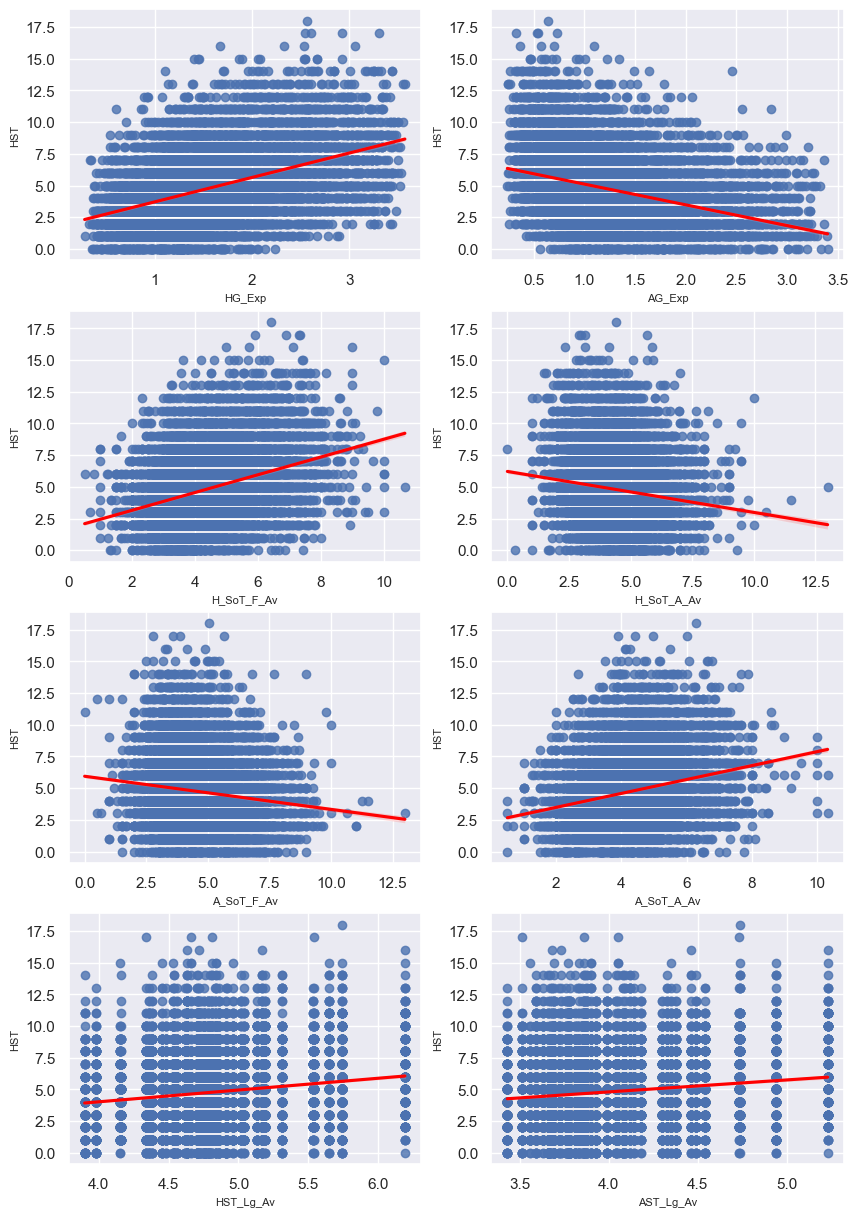

In [38]:
sns.set(rc = {'figure.figsize':(10,15), # width,length
              'axes.labelsize':8})
fig,axes = plt.subplots(4,2)

sns.regplot(data=df_comb, x='HG_Exp', y='HST', ax=axes[0,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='AG_Exp', y='HST', ax=axes[0,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='H_SoT_F_Av', y='HST', ax=axes[1,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='H_SoT_A_Av', y='HST', ax=axes[1,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='A_SoT_F_Av', y='HST', ax=axes[2,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='A_SoT_A_Av', y='HST', ax=axes[2,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='HST_Lg_Av', y='HST', ax=axes[3,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='AST_Lg_Av', y='HST', ax=axes[3,1], line_kws={'color':'red'})

# _________________________________________________________________________________

### Model the data - Split data into Train and Test groups and apply linear regression testing different combinations of features
#### Compares R^2 and rmse values as metric to determine best features

In [39]:
#Split data separating the independent and target variables
y_data = df_comb['HST']
X_data = df_comb[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=8)
print('number of test samples :', x_test.shape[0])
print('number of training samples :', x_train.shape[0])

number of test samples : 2841
number of training samples : 11363


In [41]:
# *********** CURRENTLY BEST MODEL BASED ON R^2 SCORE ************

lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_train)
r2 = lr.score(x_test[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', r2)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)


The R-Square is:  0.21652896198065663
rmse is:  2.3029822225259613
-1.0040580760693905
[ 1.57626781  0.13499736  0.08673323  0.62365509 -0.06244041 -0.02044935
 -0.06998021  0.0098287 ]


In [42]:
# remove lg_Av as a feature

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_train)
x = lr1.score(x_test[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.2137643307021403
rmse is:  2.3029822225259613
0.4048291946779523
[ 1.5568154   0.20559714  0.17025563  0.0614893   0.02329731 -0.04695215]


In [43]:
# just HG_Exp and AG_Exp

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp','AG_Exp']],y_train)
x = lr1.score(x_test[['HG_Exp','AG_Exp']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.20098077620741073
rmse is:  2.3029822225259613
1.189030294186887
[2.10608192 0.26268695]


In [44]:
# just 'HG_Exp','AG_Exp','H_SoT_F_Av','H_SoT_A_Av'

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp','AG_Exp','H_SoT_F_Av','H_SoT_A_Av']],y_train)
x = lr1.score(x_test[['HG_Exp','AG_Exp','H_SoT_F_Av','H_SoT_A_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.20810032455169414
rmse is:  2.3029822225259613
0.8704060015018995
[1.73663546 0.02323264 0.19605085 0.07471899]


### Check for linearity of the data - polynomial better??

In [45]:
# relationship may be non-linear - ploynomial transform of HG_Exp and then H_SoT_F_Av (vs HST)

#from sklearn.preprocessing import PolynomialFeatures

n=3 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,3.5)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HST')
    
    plt.show()
    plt.close()
    
X = df_comb['HG_Exp']
y = df_comb['HST']  

f = np.polyfit(X,y,n) 
p = np.poly1d(f)
print(p)

         3         2
-0.1533 x + 0.763 x + 0.8279 x + 2.231


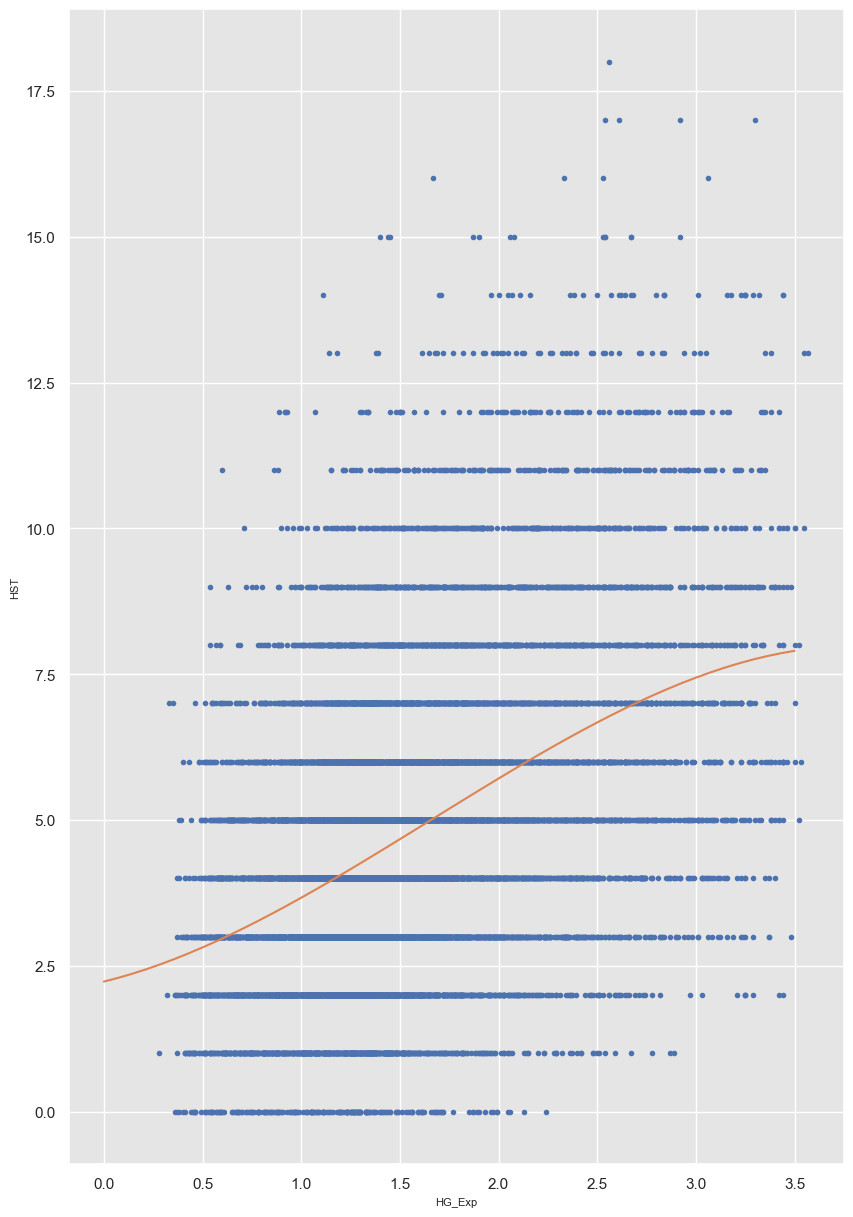

In [46]:
PlotPolly(p,X,y,'HG_Exp')

In [47]:

r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.19650709408935185


In [48]:
n=2 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,12)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HST')
    
    plt.show()
    plt.close()
    
X = df_comb['H_SoT_F_Av']
y = df_comb['HST']  

f = np.polyfit(X,y,n) 
p = np.poly1d(f)
print(p)

         2
0.02656 x + 0.4445 x + 2.316


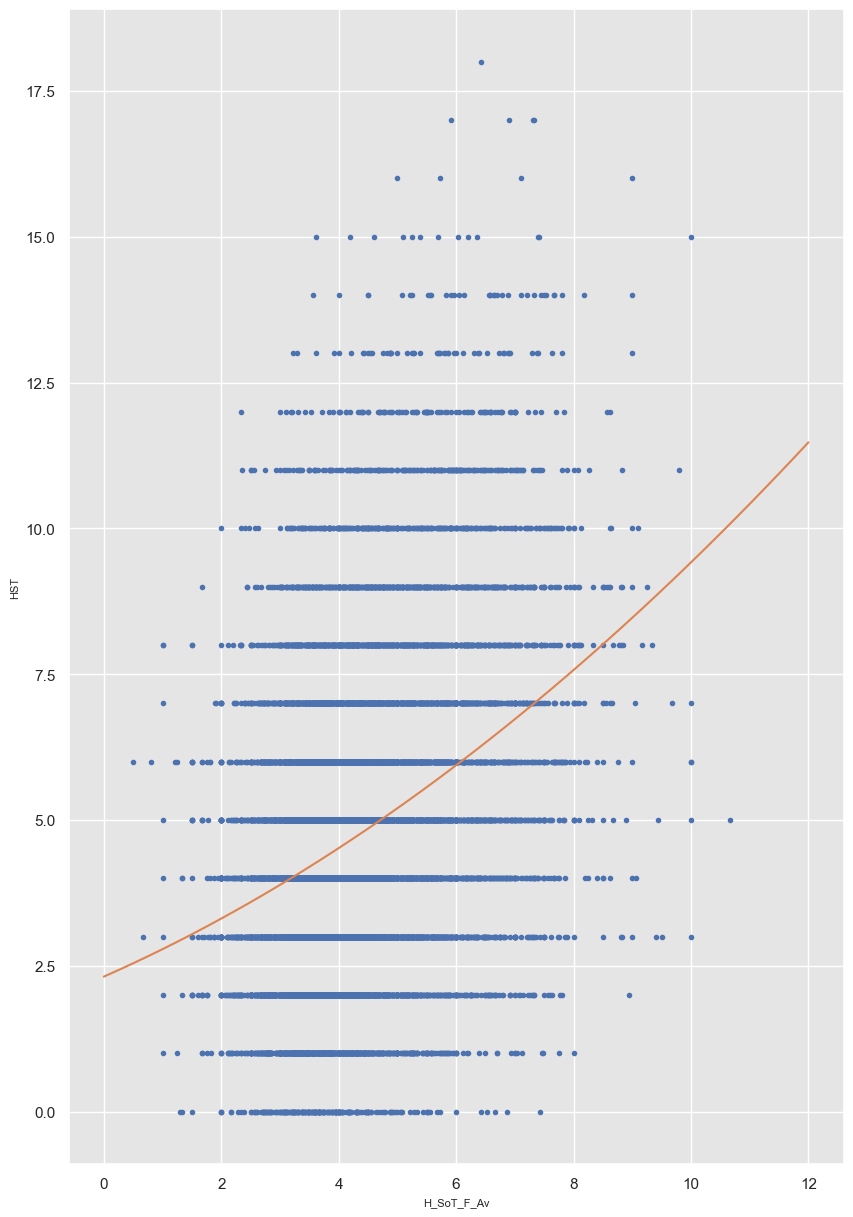

In [49]:
PlotPolly(p,X,y,'H_SoT_F_Av')

In [50]:
r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.10897742852120873


*** R2 scores do not indicate any improved relationship with polynomial fit over linear ***

# ______________________________________________________________________________

### Repeat for AST using all features of linear model which gave the best R2

In [51]:
#Split our data separating the independent and target variables
y_data = df_comb['AST']
X_data = df_comb[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']]

In [52]:

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=8)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_train)
x = lr.score(x_test[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']],y_test)

print('The R-Square is: ', x)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.1976887009721181
-1.0260333273169824
[ 0.0846411   0.01483522 -0.02112491 -0.1212127   0.57985348  0.0957788
  0.18587265  1.62326986]


# _________________________________________________________________________________

##### Conclusion:
- R sq of approx 0.20 for combined home/away for & against team features is the most appropriate regression model from this dataset

### Final fit of models to be used - using all data combined 

In [53]:
# HST BEST MODEL USING ALL DATA (no test/train split)

y = df_comb['HST']
X = df_comb[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']]

lr = LinearRegression()
lr.fit(X,y)
r = lr.score(X,y)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('**The R-Square is**: ', round(r,3))
print('rmse is: ', round(rmse,3))
print('Intercept is: ',round(lr.intercept_,3))
print('Coeff HG_Exp: ',round(lr.coef_[0],3))
print('Coeff H_SoT_F_Av: ',round(lr.coef_[1],3))
print('Coeff A_SoT_A_Av: ',round(lr.coef_[2],3))
print('Coeff HST_Lg_Av: ',round(lr.coef_[3],3))
print('Coeff AST_Lg_Av: ',round(lr.coef_[4],3))
print('Coeff A_SoT_F_Av: ',round(lr.coef_[5],3))
print('Coeff H_SoT_A_Av: ',round(lr.coef_[6],3))
print('Coeff AG_Exp: ',round(lr.coef_[7],3))

**The R-Square is**:  0.21
rmse is:  3.03
Intercept is:  -1.005
Coeff HG_Exp:  1.544
Coeff H_SoT_F_Av:  0.147
Coeff A_SoT_A_Av:  0.101
Coeff HST_Lg_Av:  0.587
Coeff AST_Lg_Av:  -0.047
Coeff A_SoT_F_Av:  -0.019
Coeff H_SoT_A_Av:  -0.046
Coeff AG_Exp:  -0.041


In [54]:
# AST BEST MODEL USING ALL DATA (no test/train split)

y = df_comb['AST']
X = df_comb[['HG_Exp', 'H_SoT_F_Av', 'A_SoT_A_Av', 'HST_Lg_Av', 'AST_Lg_Av', 'A_SoT_F_Av', 'H_SoT_A_Av', 'AG_Exp']]

lr = LinearRegression()
lr.fit(X,y)
r = lr.score(X,y)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('**The R-Square is**: ', round(r,3))
print('rmse is: ',round(rmse,2))
print('Intercept is: ',round(lr.intercept_,3))
print('Coeff HG_Exp: ',round(lr.coef_[0],3))
print('Coeff H_SoT_F_Av: ',round(lr.coef_[1],3))
print('Coeff A_SoT_A_Av: ',round(lr.coef_[2],3))
print('Coeff HST_Lg_Av: ',round(lr.coef_[3],3))
print('Coeff AST_Lg_Av: ',round(lr.coef_[4],3))
print('Coeff A_SoT_F_Av: ',round(lr.coef_[5],3))
print('Coeff H_SoT_A_Av: ',round(lr.coef_[6],3))
print('Coeff AG_Exp: ',round(lr.coef_[7],3))

**The R-Square is**:  0.199
rmse is:  2.09
Intercept is:  -0.89
Coeff HG_Exp:  0.107
Coeff H_SoT_F_Av:  0.002
Coeff A_SoT_A_Av:  -0.038
Coeff HST_Lg_Av:  -0.053
Coeff AST_Lg_Av:  0.501
Coeff A_SoT_F_Av:  0.098
Coeff H_SoT_A_Av:  0.164
Coeff AG_Exp:  1.639
